# Sentiment Analysis

This notebook goes through a basic data analysis of the IMDB dataset and the Machine Learning Algorithms with Python and in this project i will be working with the [IMDB REVIEW DATASET](https://www.kaggle.com/datasets). We would be predicting the likelihood of a movie review having a positive or negative comment.

Let's begin our understanding of exploratory data analysis of the  [IMDB REVIEW DATASET](https://www.kaggle.com/datasets). with Python then implementing some Machine Learning Algorithm in Python for classification and Prediction.

### About the Data set
>The dataset provided contains information related to movie reviews. The target variable (sentiment) represents the class and is influenced by the review. The objective of this study is to classify the target variable into Positive and Negative categories using various machine learning algorithms, with the aim of determining the most suitable algorithm for this specific dataset.

### Attribute Information

- Review (movie review in text)
- Sentiment (1 = Positive; 0 = Negative)

In [35]:
###################### Basic Imports ######################

import time, datetime # to track our Time Complexity
import os # accessing directory structure
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for Visualizing our data
sns.set_style('whitegrid') # change seaborn style to white grid


# Preprocessing
import re
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


# MACHINE LEARNING ALGORITHMS
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense


# For Metrics Performance and Result Check
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc


# from sklearn import model_selection, tree, preprocessing, metrics, linear_model

# for dumping our model
import pickle

#Import Dependencies
%matplotlib inline

## 1. Get the data and read it in
"Read the IMDB Dataset in csv form into a dataframe called data"

The Data set s stored in a folder called `../data/IMDB_Dataset.csv`

In [2]:
print(os.listdir('../data')) # Android Malware data set fie path

['IMDB_Dataset.csv']


In [3]:
data = pd.read_csv("../data//IMDB_Dataset.csv")

In [4]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


## 2. Data Cleaning

**We going to start the data cleaning process from the target variable "sentiment"**

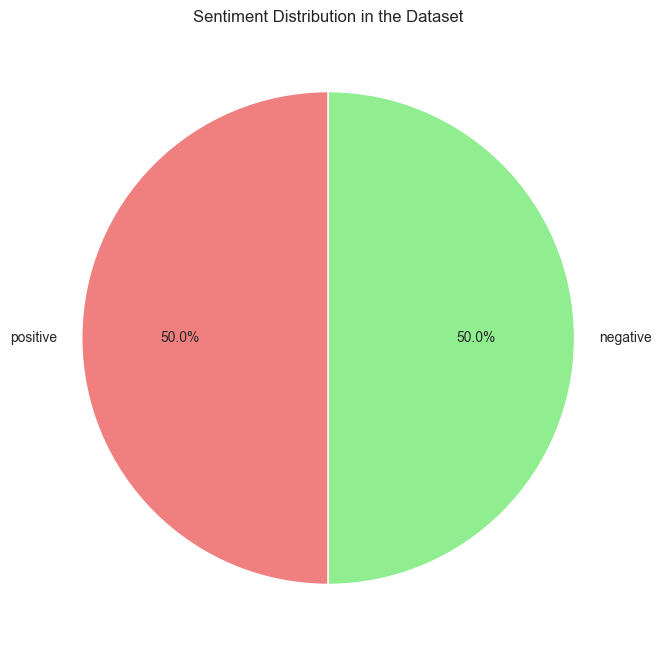

In [6]:

sentiment_distribution = data['sentiment'].value_counts()

# Plotting the Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_distribution, labels=sentiment_distribution.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
plt.title('Sentiment Distribution in the Dataset')
plt.show()


In [7]:
data["sentiment"].unique()

array(['positive', 'negative'], dtype=object)

In [8]:
dataBin = data.copy()

In [9]:
dataBin["sentiment"] = dataBin["sentiment"].map({"positive":1, "negative":0})

In [10]:
dataBin.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [11]:
dataBin.isnull().sum()

review       0
sentiment    0
dtype: int64

In [12]:
print("Total missing values : ",sum(list(dataBin.isna().sum())))

Total missing values :  0


<Axes: >

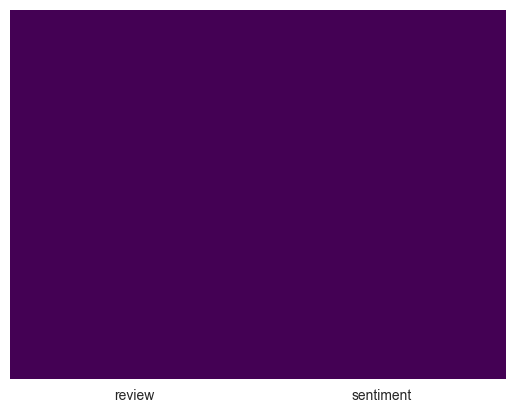

In [13]:
sns.heatmap(dataBin.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

## 3. Data Preprocessing



In [14]:
dataBin["review"][2]

'I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I\'d laughed at one of Woody\'s comedies in years (dare I say a decade?). While I\'ve never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.'

In [18]:
def remove_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

# Apply the function to remove HTML tags and symbols
dataBin['cleaned_review'] = dataBin['review'].apply(lambda x: remove_html_tags(x))
dataBin['cleaned_review'] = dataBin['cleaned_review'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x))

C:\Users\DAVEWORLD\AppData\Local\Temp\ipykernel_10376\1933538506.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


In [17]:
dataBin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   review          50000 non-null  object
 1   sentiment       50000 non-null  int64 
 2   cleaned_review  50000 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [19]:
# Check for unique characters in the entire cleaned text
unique_chars = set(' '.join(dataBin['cleaned_review']))
print("Unique Characters:", unique_chars)

Unique Characters: {'B', 'R', 'V', 'e', 'U', 'J', 'E', 'L', 's', 'p', 'Z', 'j', 'l', 'x', 'Q', 'C', 'y', 'c', 'z', 'i', 't', 'k', 'T', 'I', 'A', 'w', 'm', 'q', 'Y', 'N', 'H', 'K', ' ', 'v', 'P', 'r', 'F', 'D', 'X', 'G', 'o', 'a', 'g', 'M', 'W', 'O', 'f', 'S', 'd', 'h', 'b', 'n', 'u'}


now let's continue with the text preprocessing steps, such as converting text to lowercase, removing stopwords, and stemming/lemmatization.

In [20]:

X_train, X_test, y_train, y_test = train_test_split(
    dataBin['cleaned_review'],
    dataBin['sentiment'],
    test_size=0.2,
    random_state=42
)


In [21]:
max_words = 10000  # Choose an appropriate vocabulary size
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

max_len = 100  # Choose an appropriate sequence length
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_len)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_len)

In [22]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

# Build Simple Neural Net model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=32, input_length=max_len))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_padded, y_train, epochs=5, batch_size=64, validation_data=(X_test_padded, y_test))




Epoch 1/5


625/625 [==============================] - 14s 14ms/step - loss: 0.4158 - accuracy: 0.7976 - val_loss: 0.3203 - val_accuracy: 0.8592
Epoch 2/5
625/625 [==============================] - 8s 13ms/step - loss: 0.1865 - accuracy: 0.9309 - val_loss: 0.3812 - val_accuracy: 0.8437
Epoch 3/5
625/625 [==============================] - 8s 12ms/step - loss: 0.0417 - accuracy: 0.9895 - val_loss: 0.5166 - val_accuracy: 0.8310
Epoch 4/5
625/625 [==============================] - 8s 13ms/step - loss: 0.0055 - accuracy: 0.9995 - val_loss: 0.6019 - val_accuracy: 0.8409
Epoch 5/5
625/625 [==============================] - 8s 13ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.6478 - val_accuracy: 0.8418


In [23]:
# Build CNN model
model_cnn = Sequential()
model_cnn.add(Embedding(input_dim=max_words, output_dim=32, input_length=max_len))
model_cnn.add(Conv1D(64, 5, activation='relu'))
model_cnn.add(MaxPooling1D(5))
model_cnn.add(Flatten())
model_cnn.add(Dense(64, activation='relu'))
model_cnn.add(Dense(1, activation='sigmoid'))

# Compile the model
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_cnn.fit(X_train_padded, y_train, epochs=5, batch_size=64, validation_data=(X_test_padded, y_test))



Epoch 1/5
625/625 [==============================] - 14s 18ms/step - loss: 0.4212 - accuracy: 0.7906 - val_loss: 0.3141 - val_accuracy: 0.8584
Epoch 2/5
625/625 [==============================] - 11s 18ms/step - loss: 0.2554 - accuracy: 0.8969 - val_loss: 0.3163 - val_accuracy: 0.8613
Epoch 3/5
625/625 [==============================] - 11s 17ms/step - loss: 0.1727 - accuracy: 0.9357 - val_loss: 0.3563 - val_accuracy: 0.8546
Epoch 4/5
625/625 [==============================] - 11s 17ms/step - loss: 0.0802 - accuracy: 0.9743 - val_loss: 0.4682 - val_accuracy: 0.8473
Epoch 5/5
625/625 [==============================] - 14s 22ms/step - loss: 0.0223 - accuracy: 0.9948 - val_loss: 0.6666 - val_accuracy: 0.8500


In [24]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

# Build LSTM model
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=max_words, output_dim=32, input_length=max_len))
model_lstm.add(LSTM(64, return_sequences=True))
model_lstm.add(LSTM(32))
model_lstm.add(Dense(1, activation='sigmoid'))

# Compile the model
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_lstm.fit(X_train_padded, y_train, epochs=5, batch_size=64, validation_data=(X_test_padded, y_test))


Epoch 1/5
625/625 [==============================] - 93s 128ms/step - loss: 0.3979 - accuracy: 0.8137 - val_loss: 0.3212 - val_accuracy: 0.8584
Epoch 2/5
625/625 [==============================] - 79s 127ms/step - loss: 0.2755 - accuracy: 0.8870 - val_loss: 0.3322 - val_accuracy: 0.8595
Epoch 3/5
625/625 [==============================] - 77s 124ms/step - loss: 0.2255 - accuracy: 0.9099 - val_loss: 0.3590 - val_accuracy: 0.8577
Epoch 4/5
625/625 [==============================] - 73s 116ms/step - loss: 0.1813 - accuracy: 0.9304 - val_loss: 0.3919 - val_accuracy: 0.8479
Epoch 5/5
625/625 [==============================] - 70s 112ms/step - loss: 0.1441 - accuracy: 0.9467 - val_loss: 0.4226 - val_accuracy: 0.8446


In [26]:
def build_and_train_model(model_type, X_train_padded, y_train, X_test_padded, y_test):
    model = Sequential()

    if model_type == 'simple_nn':
        model.add(Embedding(input_dim=max_words, output_dim=32, input_length=max_len))
        model.add(Flatten())
        model.add(Dense(32, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
    elif model_type == 'cnn':
        model.add(Embedding(input_dim=max_words, output_dim=32, input_length=max_len))
        model.add(Conv1D(64, 5, activation='relu'))
        model.add(MaxPooling1D(5))
        model.add(Flatten())
        model.add(Dense(64, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
    elif model_type == 'lstm':
        model.add(Embedding(input_dim=max_words, output_dim=32, input_length=max_len))
        model.add(LSTM(64, return_sequences=True))
        model.add(LSTM(32))
        model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    start_time = time.time()
    history = model.fit(X_train_padded, y_train, epochs=5, batch_size=64, validation_data=(X_test_padded, y_test))
    end_time = time.time()

    return model, history, end_time - start_time


In [28]:
# Train Simple Neural Net model
model_simple_nn, history_simple_nn, time_simple_nn = build_and_train_model('simple_nn', X_train_padded, y_train, X_test_padded, y_test)

# Train CNN model
model_cnn, history_cnn, time_cnn = build_and_train_model('cnn', X_train_padded, y_train, X_test_padded, y_test)

# Train LSTM model
model_lstm, history_lstm, time_lstm = build_and_train_model('lstm', X_train_padded, y_train, X_test_padded, y_test)


Epoch 1/5
625/625 [==============================] - 11s 14ms/step - loss: 0.4118 - accuracy: 0.8026 - val_loss: 0.3291 - val_accuracy: 0.8535
Epoch 2/5
625/625 [==============================] - 7s 11ms/step - loss: 0.1832 - accuracy: 0.9323 - val_loss: 0.3875 - val_accuracy: 0.8423
Epoch 3/5
625/625 [==============================] - 6s 10ms/step - loss: 0.0408 - accuracy: 0.9906 - val_loss: 0.4940 - val_accuracy: 0.8390
Epoch 4/5
625/625 [==============================] - 6s 9ms/step - loss: 0.0055 - accuracy: 0.9995 - val_loss: 0.5775 - val_accuracy: 0.8432
Epoch 5/5
625/625 [==============================] - 6s 10ms/step - loss: 0.0012 - accuracy: 0.9999 - val_loss: 0.6245 - val_accuracy: 0.8416
Epoch 1/5
625/625 [==============================] - 12s 16ms/step - loss: 0.4084 - accuracy: 0.7982 - val_loss: 0.3281 - val_accuracy: 0.8564
Epoch 2/5
625/625 [==============================] - 11s 17ms/step - loss: 0.2495 - accuracy: 0.8990 - val_loss: 0.3214 - val_accuracy: 0.8594
Epoc

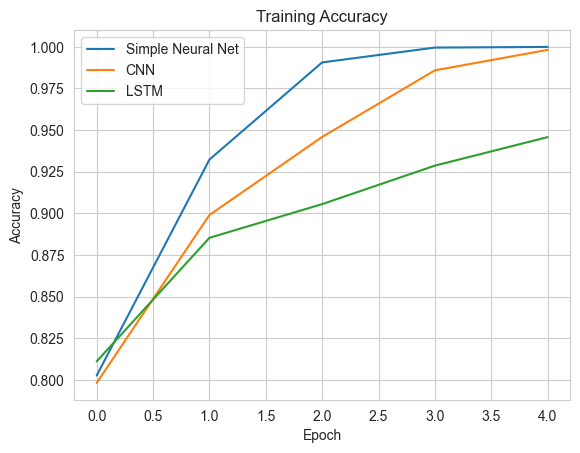

In [29]:
plt.plot(history_simple_nn.history['accuracy'], label='Simple Neural Net')
plt.plot(history_cnn.history['accuracy'], label='CNN')
plt.plot(history_lstm.history['accuracy'], label='LSTM')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


313/313 [==============================] - 10s 33ms/step


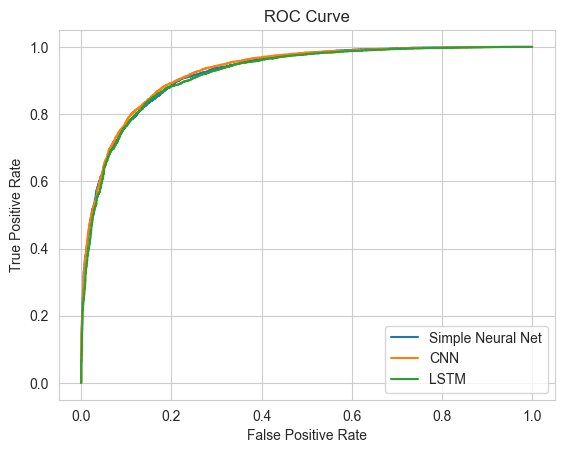

In [36]:
fpr_simple_nn, tpr_simple_nn, _ = roc_curve(y_test, model_simple_nn.predict(X_test_padded))
fpr_cnn, tpr_cnn, _ = roc_curve(y_test, model_cnn.predict(X_test_padded))
fpr_lstm, tpr_lstm, _ = roc_curve(y_test, model_lstm.predict(X_test_padded))

plt.plot(fpr_simple_nn, tpr_simple_nn, label='Simple Neural Net')
plt.plot(fpr_cnn, tpr_cnn, label='CNN')
plt.plot(fpr_lstm, tpr_lstm, label='LSTM')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [40]:
from nltk.stem.porter import PorterStemmer

# Assuming 'tokenizer' is already defined
from nltk.stem.porter import PorterStemmer

def preprocess_text(text):
    review = re.sub('[^a-zA-Z]', ' ', text)
    review = review.lower().split()
    
    ps = PorterStemmer()  # Initialize Porter Stemmer
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    
    review = ' '.join(review)
    return tokenizer.texts_to_sequences([review])
    # Assuming 'tokenizer' is already defined
    review = re.sub('[^a-zA-Z]', ' ', text)
    review = review.lower().split()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    return tokenizer.texts_to_sequences([review])

# Sample positive review
positive_review = "A wonderful little production. The filming technique is very unassuming and gives a comforting sense of realism to the entire piece. The actors are extremely well chosen. Michael Sheen has got all the polarities and voices down pat. A masterful production about one of the great master's of comedy and his life."

# Sample negative review
negative_review = "Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time. This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie. OK, first of all when you're going to make a film you must decide if it's a thriller or a drama! As a drama, the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead, I watched a drama with some meaningless thriller spots."

# Preprocess the reviews
positive_review_seq = preprocess_text(positive_review)
negative_review_seq = preprocess_text(negative_review)

# Pad the sequences
positive_review_padded = pad_sequences(positive_review_seq, maxlen=max_len)
negative_review_padded = pad_sequences(negative_review_seq, maxlen=max_len)

# Predict using the models
positive_prediction_simple_nn = model_simple_nn.predict(positive_review_padded)
negative_prediction_simple_nn = model_simple_nn.predict(negative_review_padded)

positive_prediction_cnn = model_cnn.predict(positive_review_padded)
negative_prediction_cnn = model_cnn.predict(negative_review_padded)

positive_prediction_lstm = model_lstm.predict(positive_review_padded)
negative_prediction_lstm = model_lstm.predict(negative_review_padded)

print("Simple Neural Net:")
print("Positive Review Prediction:", positive_prediction_simple_nn)
print("Negative Review Prediction:", negative_prediction_simple_nn)

print("\nCNN:")
print("Positive Review Prediction:", positive_prediction_cnn)
print("Negative Review Prediction:", negative_prediction_cnn)

print("\nLSTM:")
print("Positive Review Prediction:", positive_prediction_lstm)
print("Negative Review Prediction:", negative_prediction_lstm)


1/1 [==============================] - 0s 56ms/step
Simple Neural Net:
Positive Review Prediction: [[0.99998355]]
Negative Review Prediction: [[0.9978624]]

CNN:
Positive Review Prediction: [[0.9999384]]
Negative Review Prediction: [[0.8215555]]

LSTM:
Positive Review Prediction: [[0.9870313]]
Negative Review Prediction: [[0.9883704]]


In [41]:
from keras.models import save_model

# Assuming 'model_simple_nn', 'model_cnn', and 'model_lstm' are your trained models

# Save the Simple Neural Net model
model_simple_nn.save("simple_nn_model.h5")

# Save the CNN model
model_cnn.save("cnn_model.h5")

# Save the LSTM model
model_lstm.save("lstm_model.h5")

c:\Users\DAVEWORLD\anaconda3\envs\cvd\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import time

# Function to evaluate a model and return performance metrics
def evaluate_model(model, X_test, y_test):
    start_time = time.time()
    y_pred = (model.predict(X_test) > 0.5).astype('int32')
    end_time = time.time()

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, model.predict(X_test))

    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC-ROC': auc_roc,
        'Running Time (s)': end_time - start_time
    }

# Evaluate all three models
results = {
    'Simple NN': evaluate_model(model, X_test_padded, y_test),
    'CNN': evaluate_model(model_cnn, X_test_padded, y_test),
    'LSTM': evaluate_model(model_lstm, X_test_padded, y_test)
}


313/313 [==============================] - 12s 37ms/step


In [43]:
results_df = pd.DataFrame(results).T
print(results_df)


           Accuracy  Precision    Recall  F1 Score   AUC-ROC  Running Time (s)
Simple NN    0.8418   0.843980  0.841635  0.842806  0.922953         88.859657
CNN          0.8485   0.824733  0.888073  0.855232  0.927475         12.114410
LSTM         0.8451   0.848303  0.843421  0.845855  0.920222         20.268860


Epoch 1/5
625/625 [==============================] - 19s 23ms/step - loss: 4.4871e-04 - accuracy: 1.0000 - val_loss: 0.6855 - val_accuracy: 0.8427
Epoch 2/5
625/625 [==============================] - 10s 16ms/step - loss: 2.5737e-04 - accuracy: 1.0000 - val_loss: 0.7169 - val_accuracy: 0.8439
Epoch 3/5
625/625 [==============================] - 13s 21ms/step - loss: 1.6060e-04 - accuracy: 1.0000 - val_loss: 0.7476 - val_accuracy: 0.8444
Epoch 4/5
625/625 [==============================] - 10s 16ms/step - loss: 1.0422e-04 - accuracy: 1.0000 - val_loss: 0.7758 - val_accuracy: 0.8437
Epoch 5/5
625/625 [==============================] - 10s 16ms/step - loss: 6.9156e-05 - accuracy: 1.0000 - val_loss: 0.8028 - val_accuracy: 0.8445


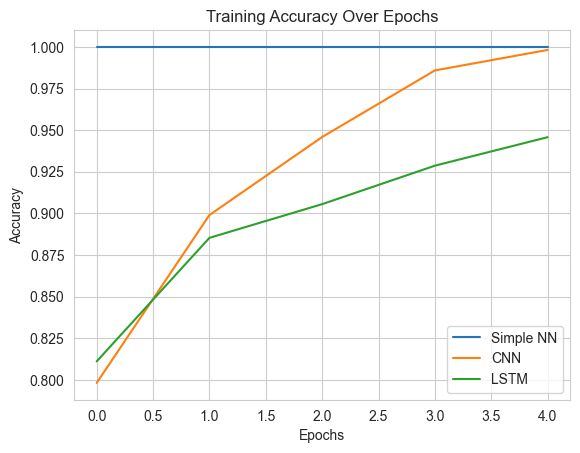

In [44]:
import matplotlib.pyplot as plt

# Assuming history objects from model training are available
history = model.fit(X_train_padded, y_train, epochs=5, batch_size=64, validation_data=(X_test_padded, y_test))

# Plot training accuracy
plt.plot(history.history['accuracy'], label='Simple NN')
plt.plot(history_cnn.history['accuracy'], label='CNN')
plt.plot(history_lstm.history['accuracy'], label='LSTM')
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


313/313 [==============================] - 12s 39ms/step


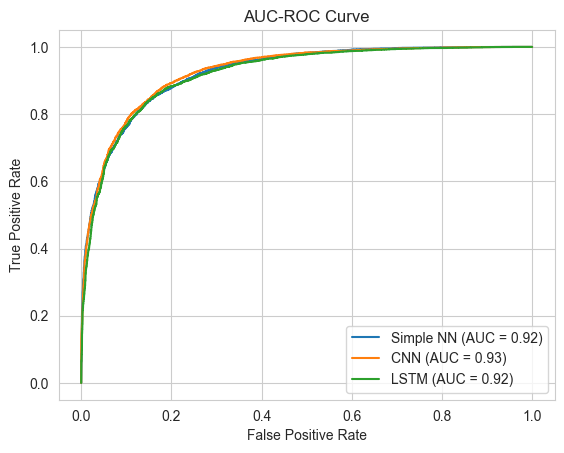

In [45]:
from sklearn.metrics import roc_curve, auc

# Function to plot AUC-ROC curve
def plot_roc_curve(model, X_test, y_test, label):
    fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

# Plot AUC-ROC curves
plot_roc_curve(model, X_test_padded, y_test, 'Simple NN')
plot_roc_curve(model_cnn, X_test_padded, y_test, 'CNN')
plot_roc_curve(model_lstm, X_test_padded, y_test, 'LSTM')
plt.title('AUC-ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


313/313 [==============================] - 1s 3ms/step


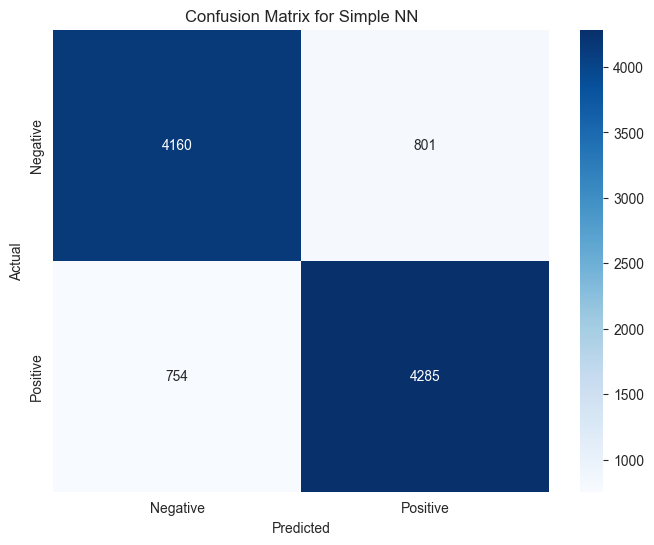

313/313 [==============================] - 1s 4ms/step


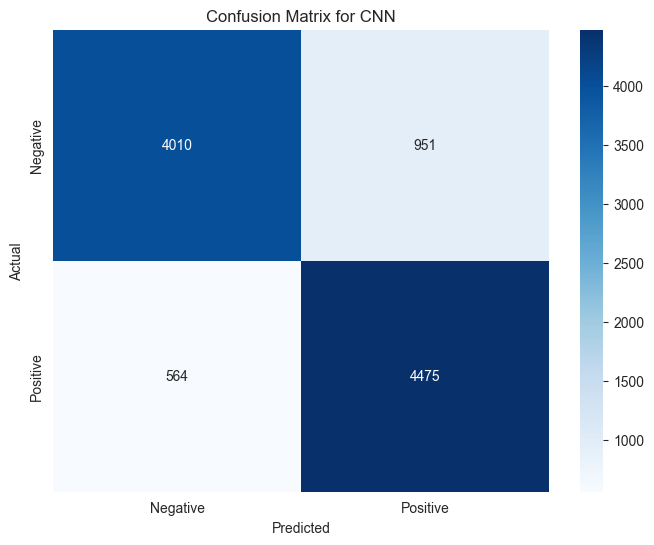

313/313 [==============================] - 10s 33ms/step


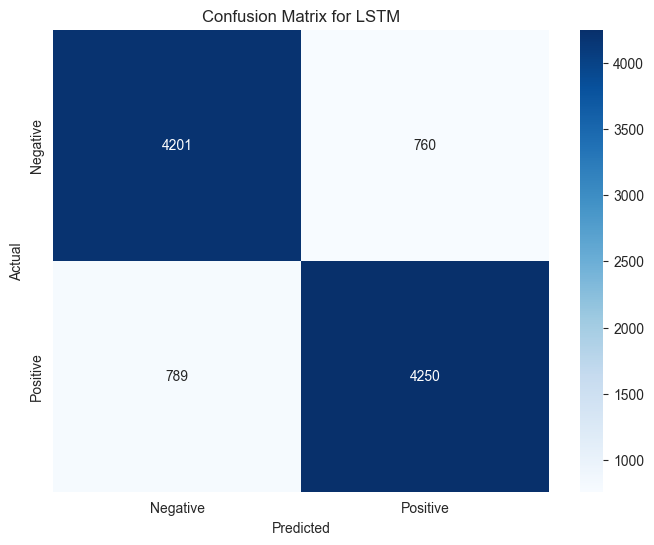

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to compute and plot confusion matrix
def plot_confusion_matrix(model, X_test, y_test, label):
    y_pred = (model.predict(X_test) > 0.5).astype('int32')
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix using Seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix for {label}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrices for all three models
plot_confusion_matrix(model, X_test_padded, y_test, 'Simple NN')
plot_confusion_matrix(model_cnn, X_test_padded, y_test, 'CNN')
plot_confusion_matrix(model_lstm, X_test_padded, y_test, 'LSTM')


In [47]:
from sklearn.metrics import confusion_matrix, classification_report

# Function to evaluate a model and return performance metrics including confusion matrix
def evaluate_model_with_confusion_matrix(model, X_test, y_test, model_name):
    start_time = time.time()
    y_pred = (model.predict(X_test) > 0.5).astype('int32')
    end_time = time.time()

    confusion_mat = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, model.predict(X_test))

    # Display confusion matrix
    print(f"Confusion Matrix for {model_name}:\n", confusion_mat)

    # Display classification report with accuracy, precision, recall, and f1-score
    classification_rep = classification_report(y_test, y_pred)
    print(f"Classification Report for {model_name}:\n", classification_rep)

    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC-ROC': auc_roc,
        'Running Time (s)': end_time - start_time
    }

# Evaluate all three models with confusion matrix
results_with_conf_matrix = {
    'Simple NN': evaluate_model_with_confusion_matrix(model, X_test_padded, y_test, 'Simple NN'),
    'CNN': evaluate_model_with_confusion_matrix(model_cnn, X_test_padded, y_test, 'CNN'),
    'LSTM': evaluate_model_with_confusion_matrix(model_lstm, X_test_padded, y_test, 'LSTM')
}

# Create a Pandas DataFrame for results with confusion matrix
results_with_conf_matrix_df = pd.DataFrame(results_with_conf_matrix).T
print(results_with_conf_matrix_df)


313/313 [==============================] - 4s 10ms/step
Confusion Matrix for Simple NN:
 [[4160  801]
 [ 754 4285]]
Classification Report for Simple NN:
               precision    recall  f1-score   support

           0       0.85      0.84      0.84      4961
           1       0.84      0.85      0.85      5039

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

313/313 [==============================] - 3s 8ms/step
Confusion Matrix for CNN:
 [[4010  951]
 [ 564 4475]]
Classification Report for CNN:
               precision    recall  f1-score   support

           0       0.88      0.81      0.84      4961
           1       0.82      0.89      0.86      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

313/313 [==============================] - 12s 38ms

In [49]:
print(results_df)

           Accuracy  Precision    Recall  F1 Score   AUC-ROC  Running Time (s)
Simple NN    0.8418   0.843980  0.841635  0.842806  0.922953         88.859657
CNN          0.8485   0.824733  0.888073  0.855232  0.927475         12.114410
LSTM         0.8451   0.848303  0.843421  0.845855  0.920222         20.268860


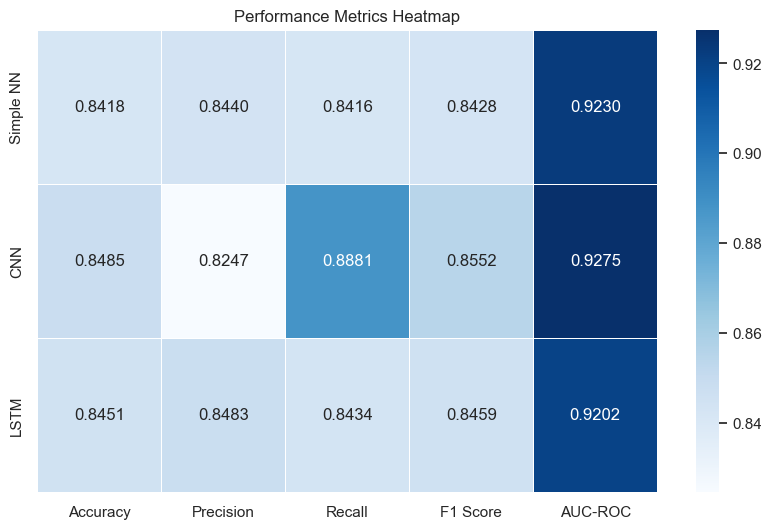

In [53]:
# Extract relevant columns from the DataFrame
heatmap_data = results_df[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC']]

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap="Blues", linewidths=.5, cbar=True)
plt.title('Performance Metrics Heatmap')
plt.show()

In [ ]:
no 